In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor
import tensorflow as tf
from IPython.display import Image, clear_output

sns.set()
tf.__version__

'2.17.1'

In [2]:
strength_data = pd.read_csv('/kaggle/input/concrete-strength-dataset/ConcreteStrengthData.csv')
strength_data

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.40,116.00,90.30,179.60,8.90,870.10,768.30,28,44.28
1026,322.20,0.00,115.60,196.00,10.40,817.90,813.40,28,31.18
1027,148.50,139.40,108.60,192.70,6.10,892.40,780.00,28,23.70
1028,159.10,186.70,0.00,175.60,11.30,989.60,788.90,28,32.77


In [3]:
strength_data.head().T

,0,1,2,3,4
CementComponent,540.00,540.00,332.50,332.50,198.60
BlastFurnaceSlag,0.00,0.00,142.50,142.50,132.40
FlyAshComponent,0.00,0.00,0.00,0.00,0.00
WaterComponent,162.00,162.00,228.00,228.00,192.00
SuperplasticizerComponent,2.50,2.50,0.00,0.00,0.00
CoarseAggregateComponent,1040.00,1055.00,932.00,932.00,978.40
FineAggregateComponent,676.00,676.00,594.00,594.00,825.50
AgeInDays,28.00,28.00,270.00,365.00,360.00
Strength,79.99,61.89,40.27,41.05,44.30


In [4]:
strength_data.shape

(1030, 9)

In [5]:
strength_data.dtypes

CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

In [6]:
strength_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
strength_data.duplicated().sum()

25

In [8]:
strength_data = strength_data.drop_duplicates()

In [9]:
strength_data

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.40,116.00,90.30,179.60,8.90,870.10,768.30,28,44.28
1026,322.20,0.00,115.60,196.00,10.40,817.90,813.40,28,31.18
1027,148.50,139.40,108.60,192.70,6.10,892.40,780.00,28,23.70
1028,159.10,186.70,0.00,175.60,11.30,989.60,788.90,28,32.77


In [10]:
strength_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CementComponent,1005.00,278.63,104.34,102.00,190.70,265.00,349.00,540.00
BlastFurnaceSlag,1005.00,72.04,86.17,0.00,0.00,20.00,142.50,359.40
FlyAshComponent,1005.00,55.54,64.21,0.00,0.00,0.00,118.30,200.10
WaterComponent,1005.00,182.08,21.34,121.80,166.60,185.70,192.90,247.00
SuperplasticizerComponent,1005.00,6.03,5.92,0.00,0.00,6.10,10.00,32.20
CoarseAggregateComponent,1005.00,974.38,77.58,801.00,932.00,968.00,1031.00,1145.00
FineAggregateComponent,1005.00,772.69,80.34,594.00,724.30,780.00,822.20,992.60
AgeInDays,1005.00,45.86,63.73,1.00,7.00,28.00,56.00,365.00
Strength,1005.00,35.25,16.28,2.33,23.52,33.80,44.87,82.60


In [11]:
strength_data.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

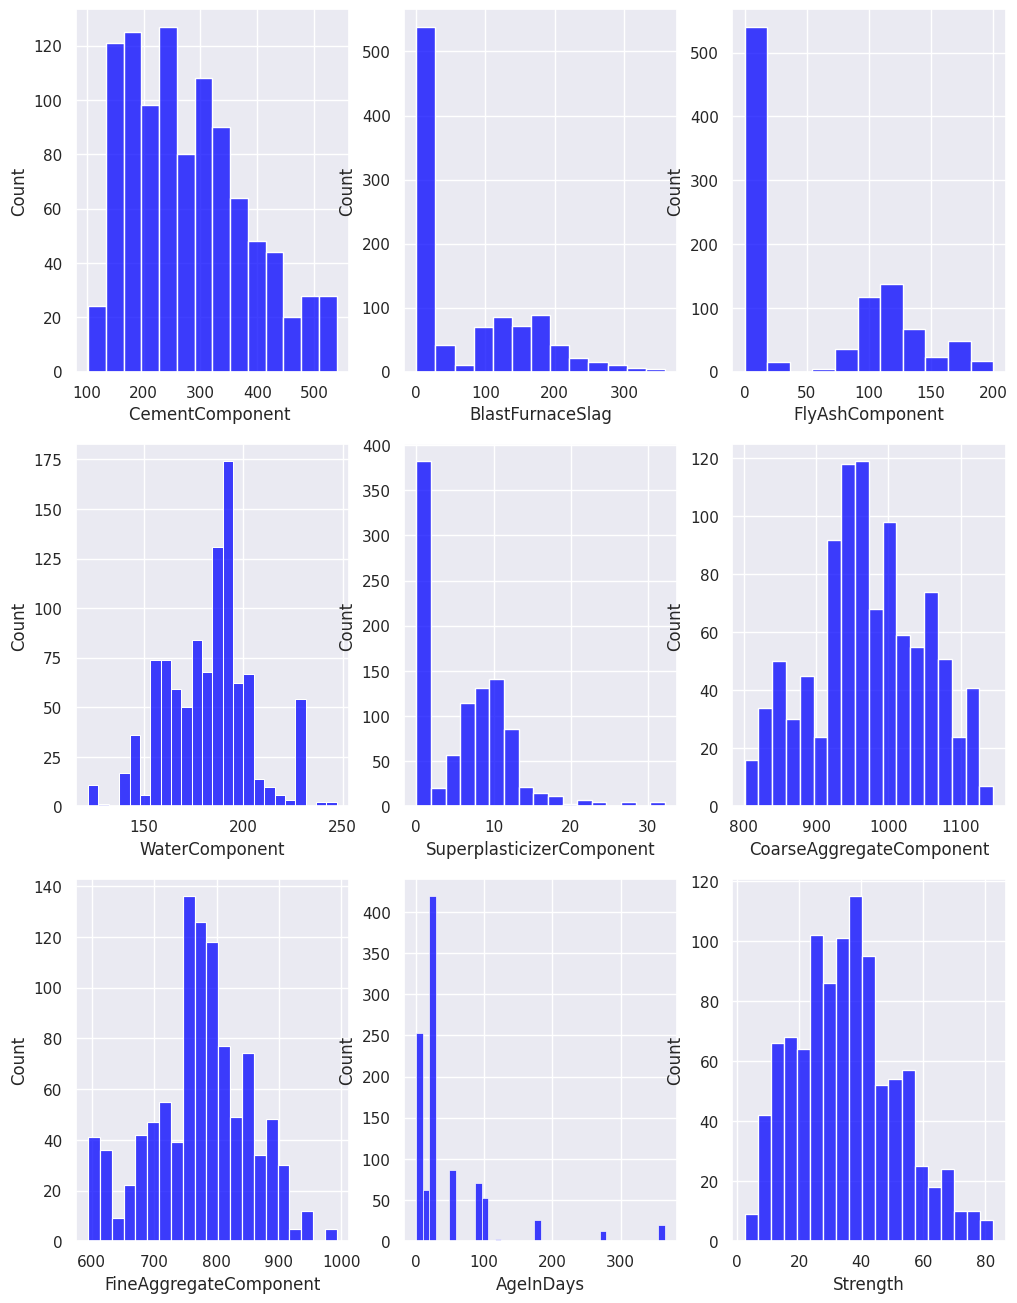

In [12]:
fig , axes = plt.subplots(3, 3, figsize=(12, 16))

axes = axes.flatten()
for i , feature in enumerate(strength_data.columns):
    sns.histplot(strength_data, x=feature, ax=axes[i], color="blue")

In [13]:
cormat = strength_data.corr()
round(cormat,2)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.00,-0.30,-0.39,-0.06,0.06,-0.09,-0.25,0.09,0.49
BlastFurnaceSlag,-0.30,1.00,-0.31,0.13,0.02,-0.28,-0.29,-0.04,0.10
FlyAshComponent,-0.39,-0.31,1.00,-0.28,0.41,-0.03,0.09,-0.16,-0.08
WaterComponent,-0.06,0.13,-0.28,1.00,-0.65,-0.21,-0.44,0.28,-0.27
SuperplasticizerComponent,0.06,0.02,0.41,-0.65,1.00,-0.24,0.21,-0.19,0.34
CoarseAggregateComponent,-0.09,-0.28,-0.03,-0.21,-0.24,1.00,-0.16,-0.01,-0.14
FineAggregateComponent,-0.25,-0.29,0.09,-0.44,0.21,-0.16,1.00,-0.16,-0.19
AgeInDays,0.09,-0.04,-0.16,0.28,-0.19,-0.01,-0.16,1.00,0.34
Strength,0.49,0.10,-0.08,-0.27,0.34,-0.14,-0.19,0.34,1.00


<Axes: >

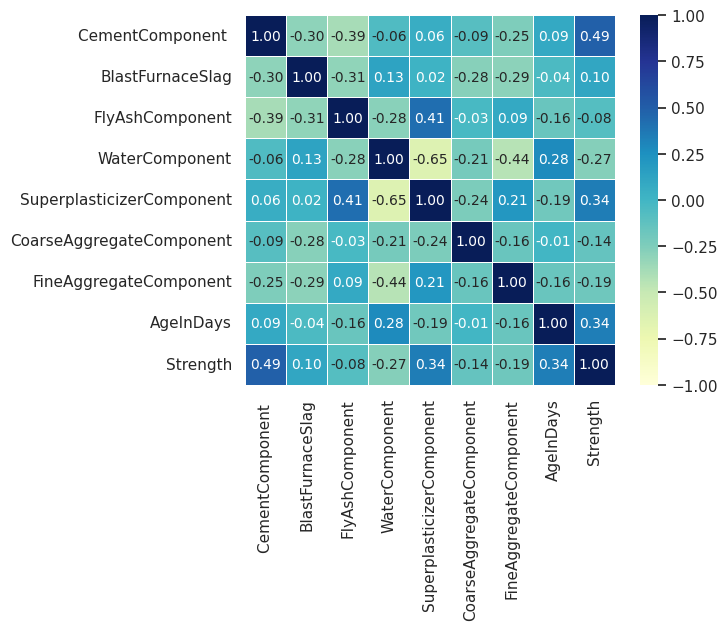

In [14]:
sns.heatmap(cormat, 
            annot=True,           
            fmt=".2f",            
            cmap="YlGnBu",        
            vmin=-1, vmax=1,      
            square=True,          
            annot_kws={"size": 10},
            linewidths=0.5)

<Axes: xlabel='CementComponent ', ylabel='Strength'>

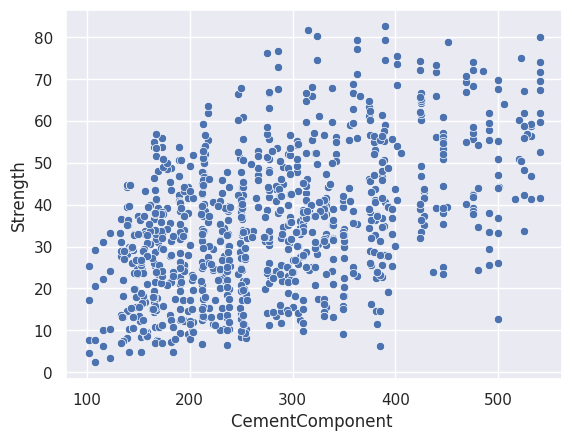

In [15]:
sns.scatterplot(x="CementComponent ", y="Strength", data=strength_data)

<Axes: xlabel='BlastFurnaceSlag', ylabel='Strength'>

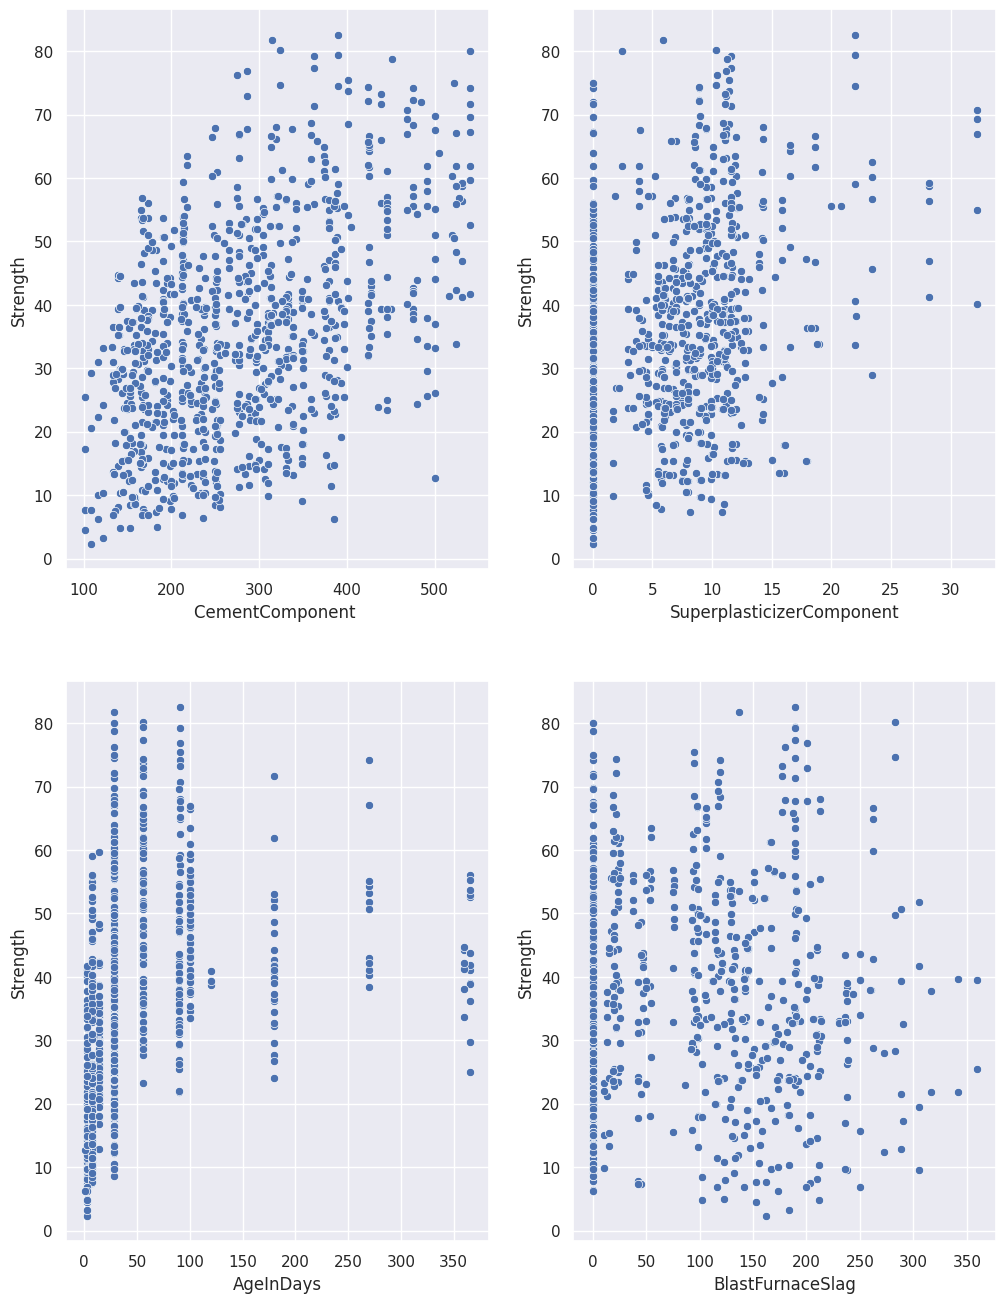

In [16]:
fig , axes = plt.subplots(2, 2, figsize=(12, 16))
axes = axes.flatten()
sns.scatterplot(x="CementComponent ", y="Strength", ax=axes[0] , data=strength_data)
sns.scatterplot(x="SuperplasticizerComponent", y="Strength", ax=axes[1] , data=strength_data)
sns.scatterplot(x="AgeInDays", y="Strength", ax=axes[2] , data=strength_data)
sns.scatterplot(x="BlastFurnaceSlag", y="Strength", ax=axes[3] , data=strength_data)

In [17]:
features = strength_data.drop(['Strength'], axis = 1)
strengths = strength_data['Strength']
inputs_train, inputs_test, target_train, target_test = train_test_split(features, strengths, test_size = 0.2, random_state = 42)

In [18]:
inputs_test, inputs_validation, target_test, target_validation = train_test_split(inputs_test, target_test , test_size=0.5,random_state = 42)

In [19]:
inputs_train.shape[1:]

(8,)

In [32]:
first_model_32 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [33]:
first_model_32.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
first_model_32.compile(
    loss = tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  
        beta_1=0.9,           
        beta_2=0.999,         
        epsilon=1e-07,        
        amsgrad=False         
    ),
    metrics=['mse', 'mae']
)


In [35]:
history_first_model = first_model_32.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 38723.8789 - mae: 181.7468 - mse: 38723.8789 - val_loss: 1506.6498 - val_mae: 31.9382 - val_mse: 1506.6498
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1463.7422 - mae: 29.6885 - mse: 1463.7422 - val_loss: 1108.5089 - val_mae: 26.7507 - val_mse: 1108.5089
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 988.2821 - mae: 24.5874 - mse: 988.2821 - val_loss: 1003.6685 - val_mae: 25.6108 - val_mse: 1003.6685
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 837.3140 - mae: 22.9386 - mse: 837.3140 - val_loss: 726.3077 - val_mae: 21.9408 - val_mse: 726.3077
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 646.5836 - mae: 20.3036 - mse: 646.5836 - val_loss: 605.1634 - val_mae: 19.8787 - val_mse: 605.1634
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 511.9040 - mae: 18.0866 - mse: 511.9040 - val_loss: 482.5783 - val_mae: 17.7902 - val_mse: 482.5783
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0

In [31]:
#history.history

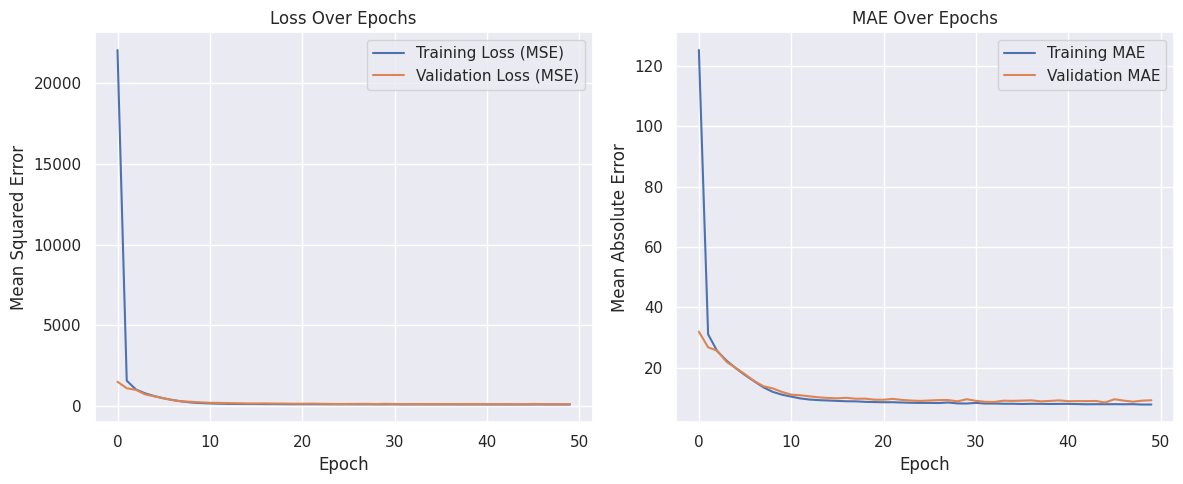

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_first_model.history['loss'], label='Training Loss (MSE)')
plt.plot(history_first_model.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_first_model.history['mae'], label='Training MAE')
plt.plot(history_first_model.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [37]:
mean_squared_error_mae_test = first_model_32.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110.7431 - mae: 8.2324 - mse: 110.7431


In [38]:
second_model_16 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [39]:
second_model_16.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
second_model_16.compile(
    loss = tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  
        beta_1=0.9,           
        beta_2=0.999,         
        epsilon=1e-07,        
        amsgrad=False         
    ),
    metrics=['mse', 'mae']
)


In [41]:
history_second_model = second_model_16.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1252345.6250 - mae: 1114.0310 - mse: 1252345.6250 - val_loss: 813158.1875 - val_mae: 898.8872 - val_mse: 813158.1875
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 670485.6875 - mae: 812.5328 - mse: 670485.6875 - val_loss: 376356.2812 - val_mae: 608.6780 - val_mse: 376356.2812
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288469.3750 - mae: 528.6618 - mse: 288469.3750 - val_loss: 130775.9609 - val_mae: 353.5061 - val_mse: 130775.9609
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93496.3047 - mae: 293.2770 - mse: 93496.3047 - val_loss: 36323.7578 - val_mae: 175.4182 - val_mse: 36323.7578
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23579.5508 - mae: 135.2207 - mse: 23579.5508 - val_loss: 10855.2363 - val_mae: 86.4084 - val_mse: 10855.2363
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7205.7417 - mae: 67.4991 - mse: 7205.7417 - val_loss: 6289.9810 - val_mae: 61.3572 - val

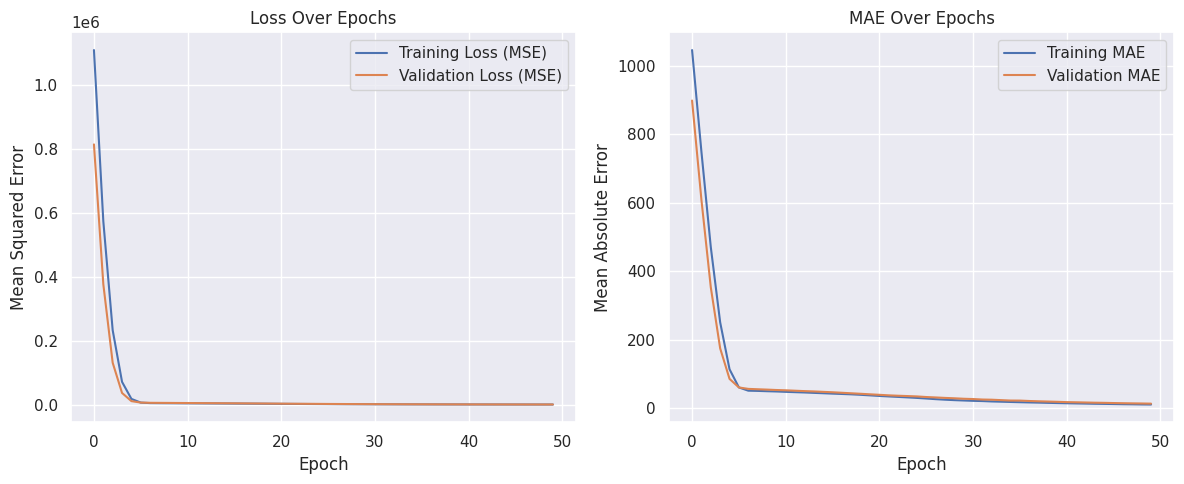

In [42]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_second_model.history['loss'], label='Training Loss (MSE)')
plt.plot(history_second_model.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_second_model.history['mae'], label='Training MAE')
plt.plot(history_second_model.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
mean_squared_error_mae_test = second_model_16.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 226.6040 - mae: 11.1238 - mse: 226.6040 


In [ ]:
#20-100 epochs

In [44]:
first_model_32 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [45]:
first_model_32.compile(
    loss = tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  
        beta_1=0.9,           
        beta_2=0.999,         
        epsilon=1e-07,        
        amsgrad=False         
    ),
    metrics=['mse', 'mae']
)


In [46]:
history_first_model = first_model_32.fit(
    inputs_train, target_train, epochs=20,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 59177.1523 - mae: 224.3771 - mse: 59177.1523 - val_loss: 2026.9839 - val_mae: 34.0744 - val_mse: 2026.9839
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2272.4434 - mae: 37.9195 - mse: 2272.4434 - val_loss: 1754.4010 - val_mae: 31.6220 - val_mse: 1754.4010
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1420.4513 - mae: 28.6301 - mse: 1420.4513 - val_loss: 1484.4128 - val_mae: 29.8214 - val_mse: 1484.4128
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1056.6111 - mae: 24.8132 - mse: 1056.6111 - val_loss: 1143.5482 - val_mae: 25.9796 - val_mse: 1143.5482
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 833.8935 - mae: 22.1454 - mse: 833.8935 - val_loss: 911.5587 - val_mae: 23.1611 - val_mse: 911.5587
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 752.6334 - mae: 20.4710 - mse: 752.6334 - val_loss: 735.9731 - val_mae: 20.8793 - val_mse: 735.9731
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━

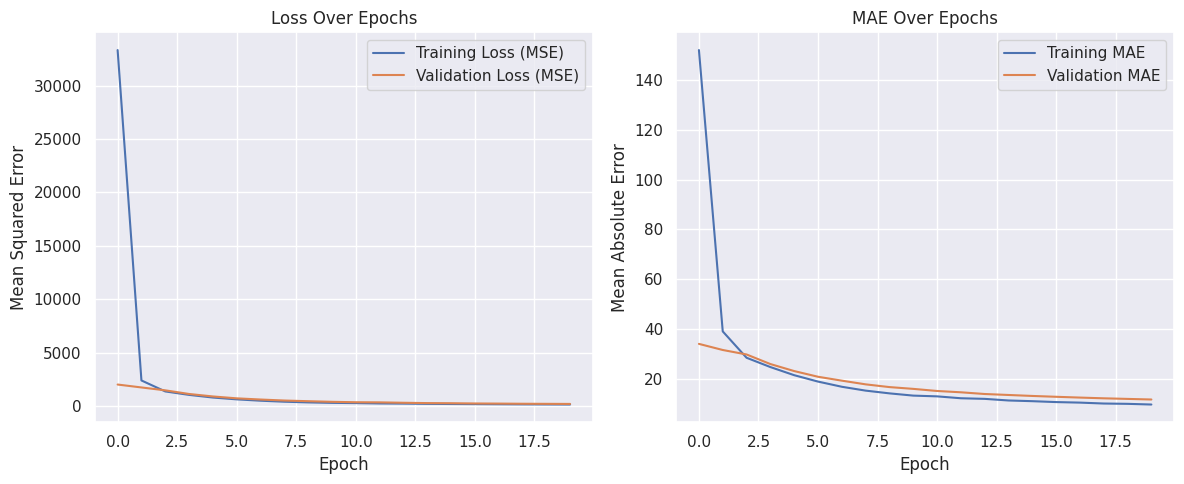

In [47]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_first_model.history['loss'], label='Training Loss (MSE)')
plt.plot(history_first_model.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_first_model.history['mae'], label='Training MAE')
plt.plot(history_first_model.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
mean_squared_error_mae_test = first_model_32.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158.1859 - mae: 9.1484 - mse: 158.1859


In [49]:
first_model_32 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
first_model_32.compile(
    loss = tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  
        beta_1=0.9,           
        beta_2=0.999,         
        epsilon=1e-07,        
        amsgrad=False         
    ),
    metrics=['mse', 'mae']
)
history_second_model = first_model_32.fit(
    inputs_train, target_train, epochs=100,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3382.7976 - mae: 47.3400 - mse: 3382.7976 - val_loss: 1635.6992 - val_mae: 32.4238 - val_mse: 1635.6992
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1179.1890 - mae: 28.0824 - mse: 1179.1890 - val_loss: 1143.4884 - val_mae: 26.7385 - val_mse: 1143.4884
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 832.2148 - mae: 23.6030 - mse: 832.2148 - val_loss: 877.7966 - val_mae: 23.3770 - val_mse: 877.7966
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 630.6241 - mae: 20.2443 - mse: 630.6241 - val_loss: 737.3204 - val_mae: 21.5797 - val_mse: 737.3204
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542.8461 - mae: 19.0507 - mse: 542.8461 - val_loss: 640.0751 - val_mae: 20.1460 - val_mse: 640.0751
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 398.6245 - mae: 16.3371 - mse: 398.6245 - val_loss: 561.9951 - val_mae: 18.8966 - val_mse: 561.9951
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━

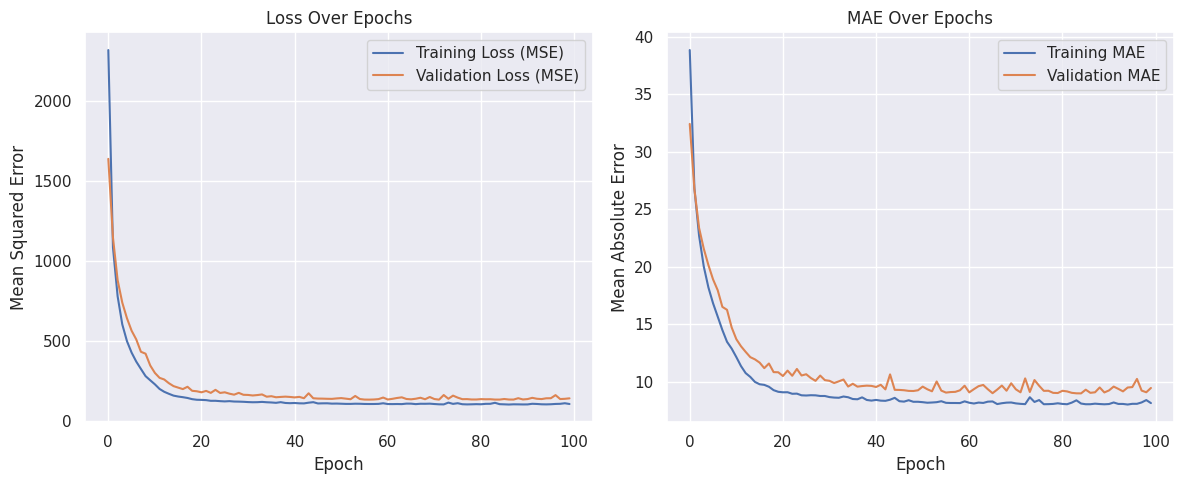

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_second_model.history['loss'], label='Training Loss (MSE)')
plt.plot(history_second_model.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_second_model.history['mae'], label='Training MAE')
plt.plot(history_second_model.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
mean_squared_error_mae_test = first_model_32.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.1518 - mae: 8.4813 - mse: 113.1518 


In [ ]:
#model_for_mae

In [52]:
model_MAE = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [53]:
model_MAE.compile(
    loss = tf.keras.losses.MeanAbsoluteError,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,           # Default
        beta_2=0.999,         
        epsilon=1e-07,        
        amsgrad=False         
        
    ),
    metrics=['mse', 'mae']  
)


In [54]:
history_MAE = model_MAE.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 44.2690 - mae: 44.2690 - mse: 3171.5393 - val_loss: 31.6675 - val_mae: 31.6675 - val_mse: 1589.9202
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.6031 - mae: 27.6031 - mse: 1257.2231 - val_loss: 24.6268 - val_mae: 24.6268 - val_mse: 934.4617
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.3294 - mae: 19.3294 - mse: 625.7312 - val_loss: 19.6889 - val_mae: 19.6889 - val_mse: 593.3981
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7657 - mae: 16.7657 - mse: 443.0822 - val_loss: 17.1595 - val_mae: 17.1595 - val_mse: 427.9779
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3008 - mae: 13.3008 - mse: 291.5007 - val_loss: 15.5285 - val_mae: 15.5285 - val_mse: 379.3950
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5966 - mae: 12.5966 - mse: 255.9352 - val_loss: 14.7355 - val_mae: 14.7355 - val_mse: 342.3779
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.

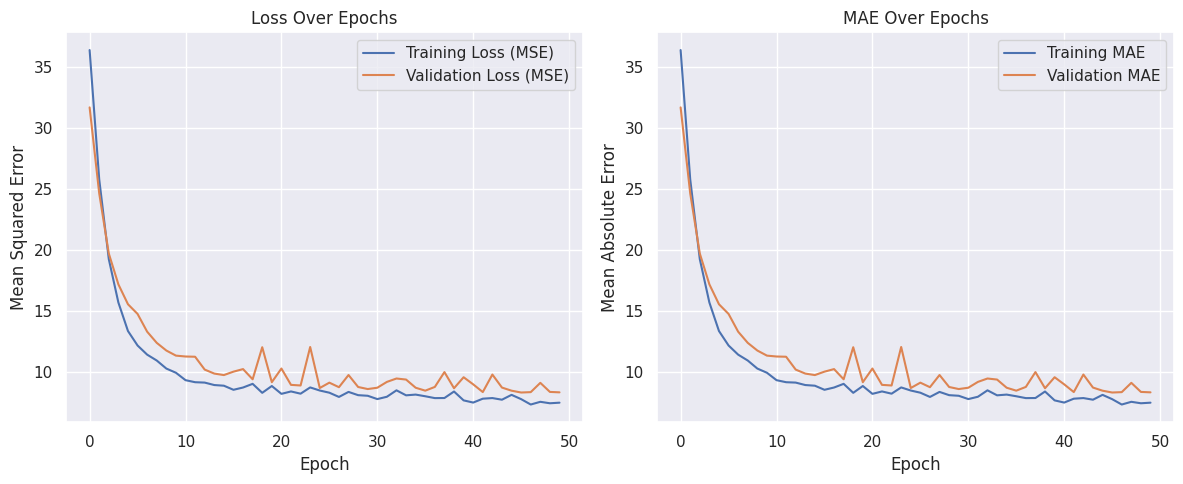

In [55]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_MAE.history['loss'], label='Training Loss (MSE)')
plt.plot(history_MAE.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_MAE.history['mae'], label='Training MAE')
plt.plot(history_MAE.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
mean_squared_error_mae_test = model_MAE.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4672 - mae: 6.4672 - mse: 74.4245 


In [57]:
first_model_32 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [65]:
first_model_32.compile(
    loss = tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  
        beta_1=0.9,           
        beta_2=0.999,         
        epsilon=1e-07,        
        amsgrad=False         
    ),
    metrics=['mse', 'mae']
)


In [66]:
history_first_model = first_model_32.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 49636.7031 - mae: 203.6188 - mse: 49636.7031 - val_loss: 2152.6580 - val_mae: 34.1863 - val_mse: 2152.6580
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2850.5276 - mae: 43.0463 - mse: 2850.5276 - val_loss: 1696.8517 - val_mae: 31.6175 - val_mse: 1696.8517
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1417.5096 - mae: 29.7900 - mse: 1417.5096 - val_loss: 1522.0878 - val_mae: 30.2473 - val_mse: 1522.0878
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1327.1438 - mae: 28.3857 - mse: 1327.1438 - val_loss: 1226.3374 - val_mae: 27.1949 - val_mse: 1226.3374
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 961.4656 - mae: 24.6864 - mse: 961.4656 - val_loss: 937.9167 - val_mae: 23.8528 - val_mse: 937.9167
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 855.9379 - mae: 23.5505 - mse: 855.9379 - val_loss: 772.7592 - val_mae: 22.0413 - val_mse: 772.7592
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━

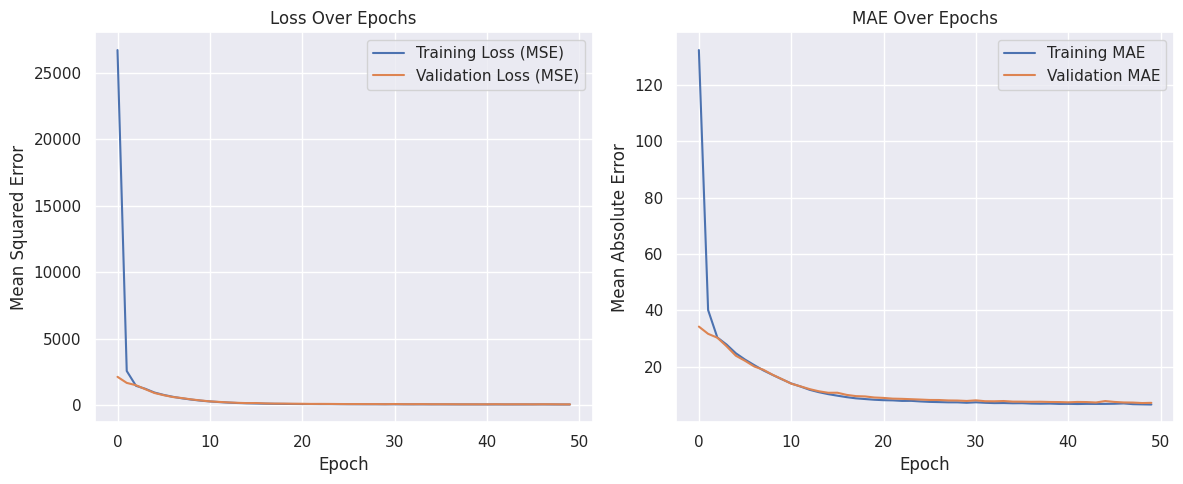

In [67]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_first_model.history['loss'], label='Training Loss (MSE)')
plt.plot(history_first_model.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_first_model.history['mae'], label='Training MAE')
plt.plot(history_first_model.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
mean_squared_error_mae_test = first_model_32.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.3611 - mae: 7.5168 - mse: 93.3611 


In [ ]:
#Huber 50 epoch

In [68]:
model_Huber = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [69]:
model_Huber.compile(
    loss = tf.keras.losses.Huber(delta=9),
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,  
        beta_1=0.9,           
        beta_2=0.999,         
        epsilon=1e-07,        
        amsgrad=False         
    ),
    metrics=['mse', 'mae']  
)


In [70]:
history_Huber = model_Huber.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3336.1636 - mae: 375.1848 - mse: 148363.8906 - val_loss: 1253.0184 - val_mae: 143.7069 - val_mse: 23641.8125
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 815.7187 - mae: 95.0558 - mse: 12505.5303 - val_loss: 494.1274 - val_mae: 59.2282 - val_mse: 5607.9028
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 405.3913 - mae: 49.3384 - mse: 4212.8765 - val_loss: 307.4008 - val_mae: 38.3519 - val_mse: 2438.3870
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305.0309 - mae: 38.1723 - mse: 2351.6460 - val_loss: 276.0828 - val_mae: 34.9284 - val_mse: 1931.0988
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 245.8223 - mae: 31.5200 - mse: 1603.9895 - val_loss: 247.1244 - val_mae: 31.7242 - val_mse: 1516.9596
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215.4046 - mae: 28.1354 - mse: 1286.3075 - val_loss: 203.1677 - val_mae: 26.7598 - val_mse: 1080.1517
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━

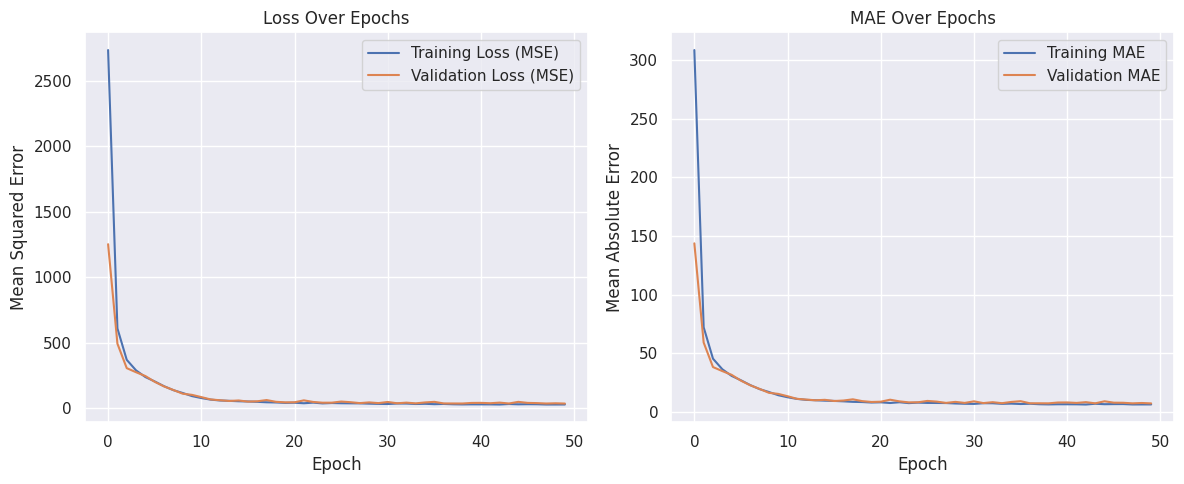

In [71]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_Huber.history['loss'], label='Training Loss (MSE)')
plt.plot(history_Huber.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_Huber.history['mae'], label='Training MAE')
plt.plot(history_Huber.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [72]:
mean_squared_error_mae_test = model_Huber.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.1364 - mae: 6.3706 - mse: 70.3540 


In [ ]:
#SGD 50 epoch MSE

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [74]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.001,
        momentum=0.9,
        nesterov=True,
        weight_decay=0.0001,
        clipnorm=1.0
),
    metrics=['mse', 'mae']
)


In [75]:
history_SGD_MSE = model.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 523.6349 - mae: 18.7930 - mse: 523.6349 - val_loss: 427.5682 - val_mae: 17.1114 - val_mse: 427.5682
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244.4938 - mae: 12.9051 - mse: 244.4938 - val_loss: 246.9171 - val_mae: 12.6455 - val_mse: 246.9171
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175.0671 - mae: 10.7444 - mse: 175.0671 - val_loss: 181.2784 - val_mae: 10.8781 - val_mse: 181.2784
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.3211 - mae: 9.8984 - mse: 148.3211 - val_loss: 178.8978 - val_mae: 11.0500 - val_mse: 178.8978
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139.3201 - mae: 9.4739 - mse: 139.3201 - val_loss: 196.8168 - val_mae: 11.5768 - val_mse: 196.8168
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.3222 - mae: 8.5558 - mse: 114.3222 - val_loss: 155.8307 - val_mae: 10.0618 - val_mse: 155.8307
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

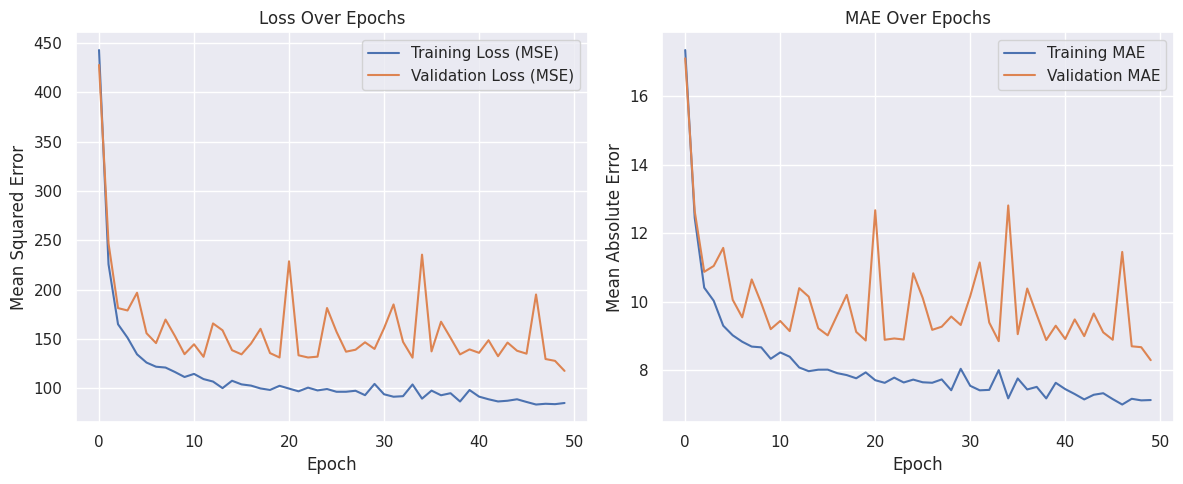

In [76]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_SGD_MSE.history['loss'], label='Training Loss (MSE)')
plt.plot(history_SGD_MSE.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_SGD_MSE.history['mae'], label='Training MAE')
plt.plot(history_SGD_MSE.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
mean_squared_error_mae_test = model.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.1298 - mae: 7.2287 - mse: 87.1298 


In [ ]:
#RMS MSE 50 epoch

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [79]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError,
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        rho=0.9,
        momentum=0.0,
        epsilon=1e-07,
        centered=False,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        loss_scale_factor=None,
        gradient_accumulation_steps=None,
        name="rmsprop",
    ),
    metrics=['mse', 'mae']
)


In [80]:
history_RMS_MSE = model.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4395.2207 - mae: 52.0773 - mse: 4395.2207 - val_loss: 999.3690 - val_mae: 26.2446 - val_mse: 999.3690
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 942.9667 - mae: 25.1316 - mse: 942.9667 - val_loss: 559.8550 - val_mae: 18.4651 - val_mse: 559.8550
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 547.0376 - mae: 18.4046 - mse: 547.0376 - val_loss: 357.5292 - val_mae: 14.7730 - val_mse: 357.5292
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321.2076 - mae: 14.0325 - mse: 321.2076 - val_loss: 250.5830 - val_mae: 12.5824 - val_mse: 250.5830
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282.6910 - mae: 13.2360 - mse: 282.6910 - val_loss: 250.6987 - val_mae: 12.9525 - val_mse: 250.6987
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212.3257 - mae: 11.5949 - mse: 212.3257 - val_loss: 664.9803 - val_mae: 22.2856 - val_mse: 664.9803
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

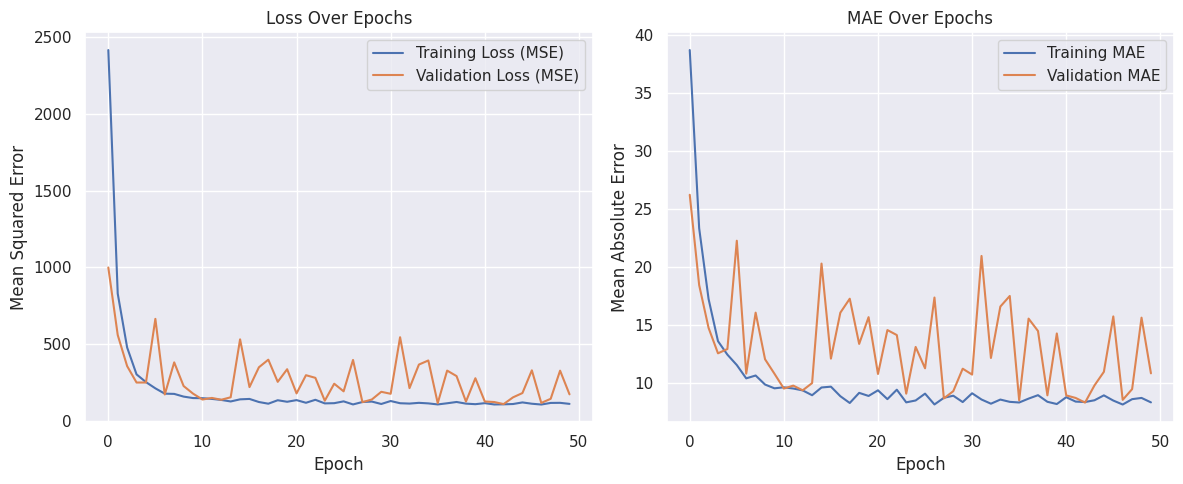

In [81]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_RMS_MSE.history['loss'], label='Training Loss (MSE)')
plt.plot(history_RMS_MSE.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_RMS_MSE.history['mae'], label='Training MAE')
plt.plot(history_RMS_MSE.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
mean_squared_error_mae_test = model.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 114.5391 - mae: 8.4385 - mse: 114.5391


In [ ]:
#SGD MAE 50 epoch

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [84]:
model.compile(
    loss = tf.keras.losses.MeanAbsoluteError,
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.001,
        momentum=0.0,
        nesterov=False,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        loss_scale_factor=None,
        gradient_accumulation_steps=None,
        name="SGD",
    ),
    metrics=['mse', 'mae']
)


In [85]:
history_SGD_MAE = model.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 266.9290 - mae: 266.9290 - mse: 461132.4062 - val_loss: 23.4934 - val_mae: 23.4934 - val_mse: 776.3098
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.1175 - mae: 32.1175 - mse: 1299.7402 - val_loss: 38.4800 - val_mae: 38.4800 - val_mse: 1762.1400
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.4773 - mae: 33.4773 - mse: 1395.5964 - val_loss: 38.6252 - val_mae: 38.6252 - val_mse: 1775.6676
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.7341 - mae: 34.7341 - mse: 1437.7130 - val_loss: 38.5899 - val_mae: 38.5899 - val_mse: 1772.8101
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.5044 - mae: 34.5044 - mse: 1439.5768 - val_loss: 38.5639 - val_mae: 38.5639 - val_mse: 1770.8042
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.1802 - mae: 35.1802 - mse: 1481.8083 - val_loss: 38.5379 - val_mae: 38.5379 - val_mse: 1768.7996
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

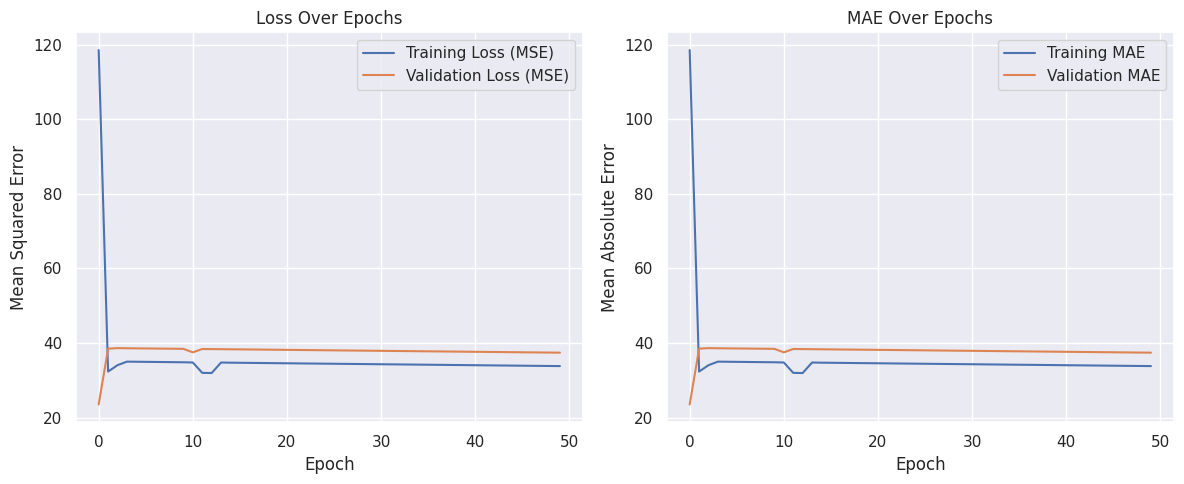

In [86]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_SGD_MAE.history['loss'], label='Training Loss (MSE)')
plt.plot(history_SGD_MAE.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_SGD_MAE.history['mae'], label='Training MAE')
plt.plot(history_SGD_MAE.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
mean_squared_error_mae_test = model.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.4091 - mae: 32.4091 - mse: 1327.7550 


In [ ]:
#RMS MAE 50 epoch

In [88]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [89]:
model.compile(
    loss = tf.keras.losses.MeanAbsoluteError,
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        rho=0.9,
        momentum=0.0,
        epsilon=1e-07,
        centered=False,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        loss_scale_factor=None,
        gradient_accumulation_steps=None,
        name="rmsprop",
    ),
    metrics=['mse', 'mae']
)


In [90]:
history_RMS_MAE = model.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 39.3733 - mae: 39.3733 - mse: 2794.3110 - val_loss: 36.8880 - val_mae: 36.8880 - val_mse: 1866.1118
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.5587 - mae: 20.5587 - mse: 692.2175 - val_loss: 22.3563 - val_mae: 22.3563 - val_mse: 775.4920
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.6602 - mae: 15.6602 - mse: 402.1496 - val_loss: 15.9085 - val_mae: 15.9085 - val_mse: 400.3765
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5357 - mae: 12.5357 - mse: 245.1463 - val_loss: 16.7563 - val_mae: 16.7563 - val_mse: 468.6331
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.8684 - mae: 12.8684 - mse: 262.7392 - val_loss: 16.0948 - val_mae: 16.0948 - val_mse: 353.4897
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2064 - mae: 12.2064 - mse: 231.4517 - val_loss: 12.0068 - val_mae: 12.0068 - val_mse: 208.9538
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7

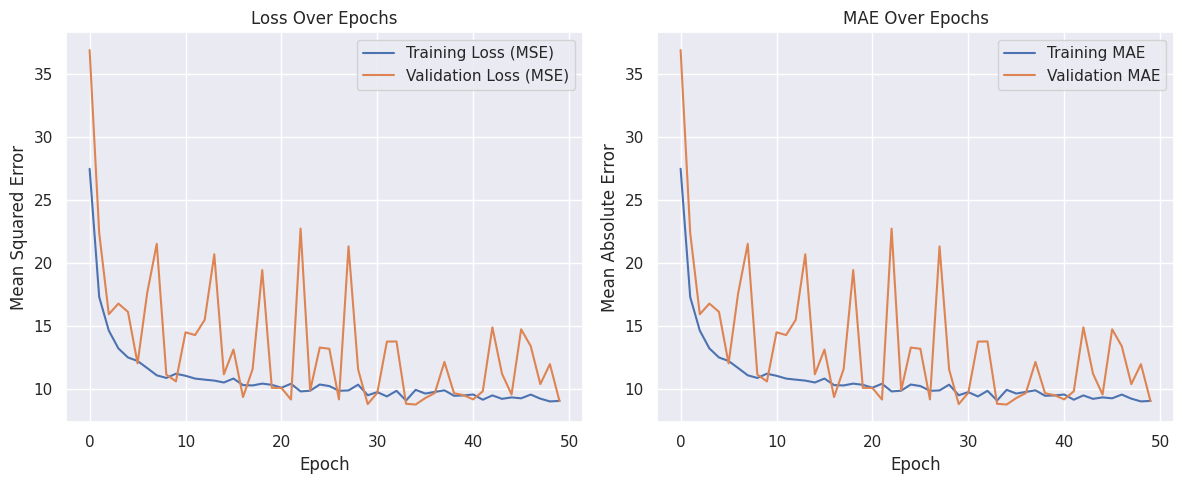

In [91]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_RMS_MAE.history['loss'], label='Training Loss (MSE)')
plt.plot(history_RMS_MAE.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_RMS_MAE.history['mae'], label='Training MAE')
plt.plot(history_RMS_MAE.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
mean_squared_error_mae_test = model.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2888 - mae: 7.2888 - mse: 94.3277 


In [85]:
# SGD Huber 50

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [94]:
model.compile(
    loss = tf.keras.losses.Huber(delta=9),
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.01,
        momentum=0.0,
        nesterov=False,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        loss_scale_factor=None,
        gradient_accumulation_steps=None,
        name="SGD",
    ),
    metrics=['mse', 'mae']
)


In [95]:
history_SGD_Huber = model.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 55053292.0000 - mae: 6117037.0000 - mse: 414866930139136.0000 - val_loss: 289.1149 - val_mae: 36.5860 - val_mse: 1622.0400
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253.7694 - mae: 32.6705 - mse: 1331.0156 - val_loss: 269.0138 - val_mae: 34.2969 - val_mse: 1459.7783
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240.1600 - mae: 31.1031 - mse: 1226.6982 - val_loss: 249.7411 - val_mae: 32.0972 - val_mse: 1311.1394
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 223.6544 - mae: 29.2005 - mse: 1124.8600 - val_loss: 231.7511 - val_mae: 30.0250 - val_mse: 1177.6326
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.6704 - mae: 25.8213 - mse: 920.0677 - val_loss: 215.0543 - val_mae: 28.1168 - val_mse: 1057.8959
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179.4825 - mae: 24.0922 - mse: 823.6054 - val_loss: 199.6062 - val_mae: 26.3432 - val_mse: 950.9034
Epoch 7/50
26/26 ━━━━━

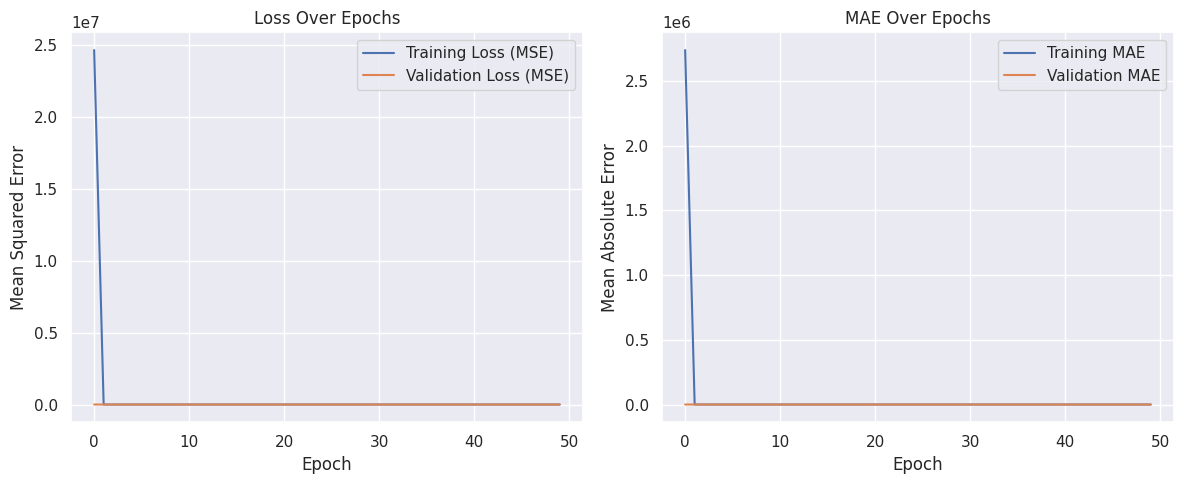

In [96]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_SGD_Huber.history['loss'], label='Training Loss (MSE)')
plt.plot(history_SGD_Huber.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_SGD_Huber.history['mae'], label='Training MAE')
plt.plot(history_SGD_Huber.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [97]:
mean_squared_error_mae_test = model.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.6288 - mae: 13.1249 - mse: 277.4137 


In [91]:
# Huber RMS 50 epoch

In [100]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [101]:
model.compile(
    loss = tf.keras.losses.Huber(delta=9),
    optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        rho=0.9,
        momentum=0.0,
        epsilon=1e-07,
        centered=False,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        loss_scale_factor=None,
        gradient_accumulation_steps=None,
        name="rmsprop",
    ),
    metrics=['mse', 'mae'] 
)


In [102]:
history_RMS_Huber = model.fit(
    inputs_train, target_train, epochs=50,
    validation_data = (inputs_validation, target_validation),
    verbose=1
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2229.0610 - mae: 252.1732 - mse: 70335.6484 - val_loss: 401.0806 - val_mae: 48.9472 - val_mse: 3246.7930
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259.2770 - mae: 33.0782 - mse: 1628.9966 - val_loss: 165.3369 - val_mae: 22.4967 - val_mse: 751.8916
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125.8790 - mae: 18.0766 - mse: 509.2982 - val_loss: 175.9115 - val_mae: 23.7631 - val_mse: 832.4407
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.7809 - mae: 14.0381 - mse: 337.2989 - val_loss: 130.0449 - val_mae: 18.5735 - val_mse: 484.8016
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.9055 - mae: 12.9676 - mse: 267.9255 - val_loss: 126.9417 - val_mae: 18.2141 - val_mse: 466.4607
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.6445 - mae: 12.6908 - mse: 247.5788 - val_loss: 105.2341 - val_mae: 15.7135 - val_mse: 353.9551
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

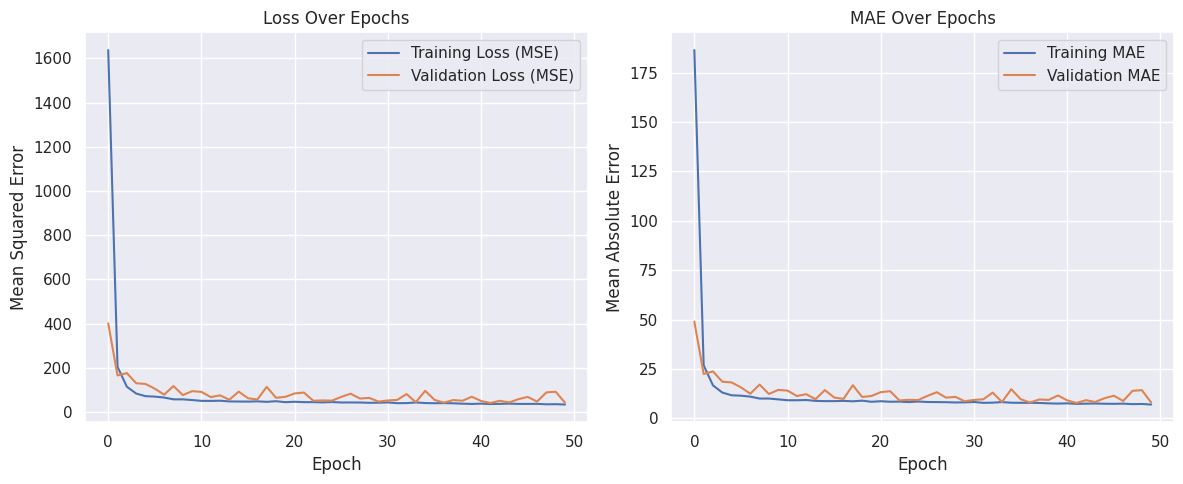

In [103]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_RMS_Huber.history['loss'], label='Training Loss (MSE)')
plt.plot(history_RMS_Huber.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_RMS_Huber.history['mae'], label='Training MAE')
plt.plot(history_RMS_Huber.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
mean_squared_error_mae_test = model.evaluate(inputs_test, target_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.3986 - mae: 7.6095 - mse: 91.4614 
